<a href="https://colab.research.google.com/github/vishnudas-raveendran/PGP-AIML/blob/master/NLP/Project%202/NLP_Project_2_Part_1_Movie_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part A

The  objective  of  this  project  is  to  build  a  text  classification  model  that analyses the customer's sentiments based on their reviews in the IMDB database. The model uses a complex deep learning model to build an embedding layer followed by a classification algorithm to analyse the sentiment of the customers

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)
import numpy as np
from matplotlib import pyplot
from keras.preprocessing.sequence import pad_sequences

2.8.0


## 1. Import the dataset

a) Import imdb dataset from keras and use only top 10K most frequent words

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.imdb.load_data(
    path='imdb.npz', num_words=10000, skip_top=0, seed=113)

17473536/17464789 [==============================] - 0s 0us/step


In [3]:
print(f"Training data size: {y_train.shape[0]}, Test data size: {y_test.shape[0]}")

Training data size: 25000, Test data size: 25000


## 2. Perform relevent sequence adding on data

Review length: 
Mean 238.71 words (176.493674)


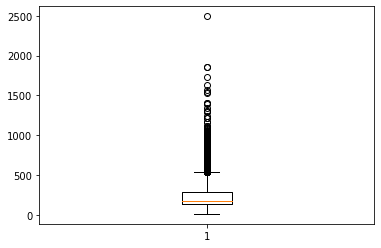

In [4]:
# Summarize review length
print("Review length: ")
result = [len(x) for x in X_train]
print("Mean %.2f words (%f)" % (np.mean(result), np.std(result)))
# plot review length
pyplot.boxplot(result)
pyplot.show()

We can therefore take input dimension as 200 words for padding

In [5]:
X_train = pad_sequences(X_train, maxlen=200)
X_test = pad_sequences(X_test, maxlen=200)

## 3. Perform Data Analyses

a) Print shape of feature and labels

In [6]:
X_train.shape

(25000, 200)

In [7]:
y_train.shape

(25000,)

b) Print any one feature and its label

In [8]:
print("\nTraining Feature: \n")
print(X_train[0])
print("\n\n Label for above feature: ",end=f"{y_train[0]}")


Training Feature: 

[   5   25  100   43  838  112   50  670    2    9   35  480  284    5
  150    4  172  112  167    2  336  385   39    4  172 4536 1111   17
  546   38   13  447    4  192   50   16    6  147 2025   19   14   22
    4 1920 4613  469    4   22   71   87   12   16   43  530   38   76
   15   13 1247    4   22   17  515   17   12   16  626   18    2    5
   62  386   12    8  316    8  106    5    4 2223 5244   16  480   66
 3785   33    4  130   12   16   38  619    5   25  124   51   36  135
   48   25 1415   33    6   22   12  215   28   77   52    5   14  407
   16   82    2    8    4  107  117 5952   15  256    4    2    7 3766
    5  723   36   71   43  530  476   26  400  317   46    7    4    2
 1029   13  104   88    4  381   15  297   98   32 2071   56   26  141
    6  194 7486   18    4  226   22   21  134  476   26  480    5  144
   30 5535   18   51   36   28  224   92   25  104    4  226   65   16
   38 1334   88   12   16  283    5   16 4472  113  103 

## 4. Decode feature to get original sentence back

In [9]:
# Retrieve the word index file mapping words to indices
word_index = tf.keras.datasets.imdb.get_word_index()
# Reverse the word index to obtain a dict mapping indices to words
inverted_word_index = dict((i, word) for (word, i) in word_index.items())
# Decode the first sequence in the dataset
decoded_sequence = " ".join(inverted_word_index[i] for i in X_train[0])

1654784/1641221 [==============================] - 0s 0us/step


In [10]:
decoded_sequence

"to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit then have two of script their with her nobody most that with wasn't to with armed acting watch an for with heartfelt fi

## 5. Train, Test a Sequential Model

In [12]:
X_val = X_train[:10000]
partial_X_train = X_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

print("x_val ", X_val.shape)
print("partial_x_train ", partial_X_train.shape)
print("y_val ", y_val.shape)
print("partial_y_train ", partial_y_train.shape)

x_val  (10000, 200)
partial_x_train  (15000, 200)
y_val  (10000,)
partial_y_train  (15000,)


In [60]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense,  LSTM, Embedding, Flatten
from tensorflow.keras.models import  Sequential

model = Sequential()
model.add(Embedding(input_dim = 10000, output_dim = 100, input_length = 200))
model.add(LSTM(64, activation = 'relu', return_sequences=True))
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 200, 100)          1000000   
                                                                 
 lstm_10 (LSTM)              (None, 200, 64)           42240     
                                                                 
 flatten_8 (Flatten)         (None, 12800)             0         
                                                                 
 dense_60 (Dense)            (None, 512)               6554112   
                                                                 
 dense_61 (Dense)            (None, 256)               131328    
                                                                 
 dense_62 (Dense)            (None, 1)                 257       
                                                                 
Total params: 7,727,937
Trainable params: 7,727,937
N

In [39]:
X_train.shape

(25000, 200)

In [41]:
y_train.shape

(25000,)

In [61]:
model.fit(partial_X_train, partial_y_train, epochs = 3, batch_size=256, verbose = 1, validation_data=(X_val, y_val))

Epoch 1/3
59/59 [==============================] - 151s 432ms/step - loss: 0.5599 - accuracy: 0.6769 - val_loss: 0.3358 - val_accuracy: 0.8568
Epoch 2/3
59/59 [==============================] - 28s 483ms/step - loss: 0.2360 - accuracy: 0.9082 - val_loss: 0.2884 - val_accuracy: 0.8835
Epoch 3/3
59/59 [==============================] - 22s 376ms/step - loss: 0.1239 - accuracy: 0.9577 - val_loss: 0.3706 - val_accuracy: 0.8651


In [35]:
score,acc = model.evaluate(X_test, y_test, verbose = 2, batch_size = 32)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

782/782 - 20s - loss: 0.3392 - accuracy: 0.8680 - 20s/epoch - 26ms/step
score: 0.34
acc: 0.87


## 6. Predict a movie review rating

In [120]:
def print_msg(rating):
  if rating >= 0.75:
    print("Based on various reviews, this movie review is a positive rating of "+str(round(rating*100,2))+" %")
  elif rating < 0.75 and rating > 0.5:
    print("Based on various reviews, this movie review is a average rating of "+str(round(rating*100,2))+" %")
  elif rating <= 0.5:
    print("Based on various reviews, this movie review is poor rating of "+str(round(rating*100,2))+" %")

In [54]:
from nltk import word_tokenize
from keras.preprocessing import sequence
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [121]:
word2index = tf.keras.datasets.imdb.get_word_index()
test=[]
for word in word_tokenize("good acting casting wonderful and beautiful must watch movie"):
     test.append(word2index[word])

test=sequence.pad_sequences([test],maxlen=200)
recommend = model.predict(test)

In [122]:
print_msg(recommend[0][0])

Based on various reviews, this movie review is a positive rating of 80.37 %


In [123]:
word2index = tf.keras.datasets.imdb.get_word_index()
test=[]
for word in word_tokenize("could have been better"):
     test.append(word2index[word])

test=sequence.pad_sequences([test],maxlen=200)
recommend = model.predict(test)

In [124]:
print_msg(recommend[0][0])

Based on various reviews, this movie review is a average rating of 57.0 %


In [131]:
## Misc to print HTML
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-generic-recommended

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  javascript-common libcupsfilters1 libcupsimage2 libgs9 libgs9-common
  libijs-0.35 libjbig2dec0 libjs-jquery libkpathsea6 libpotrace0 libptexenc1
  libruby2.5 libsynctex1 libtexlua52 libtexluajit2 libzzip-0-13 lmodern
  poppler-data preview-latex-style rake ruby ruby-did-you-mean ruby-minitest
  ruby-net-telnet ruby-power-assert ruby-test-unit ruby2.5
  rubygems-integration t1utils tex-common tex-gyre texlive-base
  texlive-binaries texlive-latex-base texlive-latex-extra
  texlive-latex-recommended texlive-pictures texlive-plain-generic tipa
Suggested packages:
  fonts-noto apache2 | lighttpd | httpd poppler-utils ghostscript
  fonts-japanese-mincho | fonts-ipafont-mincho fonts-japanese-gothic
  | fonts-ipafont-gothic fonts-arphic-ukai fonts-arphic-uming fonts-

In [133]:
%cd '/content/drive/MyDrive/Colab Notebooks/'
!jupyter nbconvert --to html 'NLP Project 2 Part 1: Movie Review.ipynb'

/content/drive/MyDrive/Colab Notebooks
[NbConvertApp] Converting notebook NLP Project 2 Part 1: Movie Review.ipynb to html
[NbConvertApp] Writing 348417 bytes to NLP Project 2 Part 1: Movie Review.html
